In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [2]:
df = pd.read_csv("loan.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

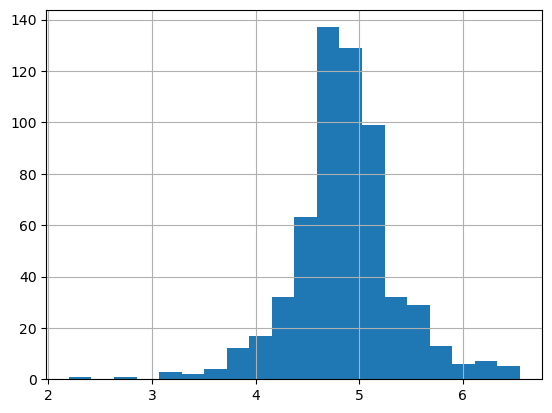

In [6]:
df['loanAmount_log']=np.log(df['LoanAmount'])
df['loanAmount_log'].hist(bins=20)

<AxesSubplot:>

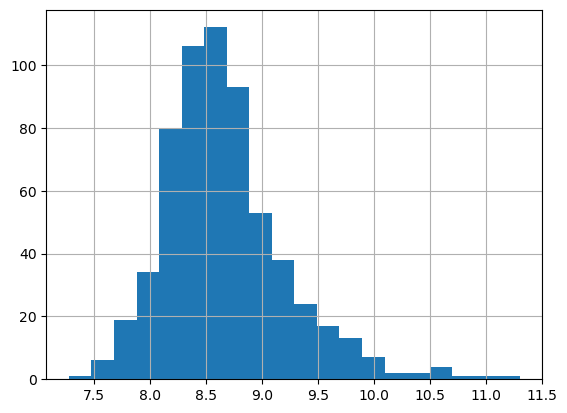

In [7]:
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']
df['TotalIncome_log']=np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)

In [8]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df.loanAmount_log = df.loanAmount_log.fillna(df.loanAmount_log.mean())

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [9]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,loanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,4.262680,2900.0,7.972466
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,3.688879,4106.0,8.320205
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,5.533389,8312.0,9.025456
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,5.231109,7583.0,8.933664


In [10]:
df['Gender']=df['Gender'].map({'Male':0,'Female':1})
df['Married']=df['Married'].map({'Yes':1,'No':0})
df['Education']=df['Education'].map({'Graduate':1,'Not Graduate':0})
df['Self_Employed']=df['Self_Employed'].map({'Yes':1,'No':0})
df['Loan_Status']=df['Loan_Status'].map({'Y':1,'N':0})

In [11]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,loanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,Urban,1,4.857444,5849.0,8.674026
1,LP001003,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,Rural,0,4.852030,6091.0,8.714568
2,LP001005,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,Urban,1,4.189655,3000.0,8.006368
3,LP001006,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,Urban,1,4.787492,4941.0,8.505323
4,LP001008,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,Urban,1,4.948760,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,1,0,2900,0.0,71.000000,360.0,1.0,Rural,1,4.262680,2900.0,7.972466
610,LP002979,0,1,3+,1,0,4106,0.0,40.000000,180.0,1.0,Rural,1,3.688879,4106.0,8.320205
611,LP002983,0,1,1,1,0,8072,240.0,253.000000,360.0,1.0,Urban,1,5.533389,8312.0,9.025456
612,LP002984,0,1,2,1,0,7583,0.0,187.000000,360.0,1.0,Urban,1,5.231109,7583.0,8.933664


In [12]:
x=df[['Gender','Married','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount',
    'Loan_Amount_Term','Credit_History']]
y=df[['Loan_Status']]

In [13]:
x

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,0,1,0,5849,0.0,146.412162,360.0,1.0
1,0,1,1,0,4583,1508.0,128.000000,360.0,1.0
2,0,1,1,1,3000,0.0,66.000000,360.0,1.0
3,0,1,0,0,2583,2358.0,120.000000,360.0,1.0
4,0,0,1,0,6000,0.0,141.000000,360.0,1.0
...,...,...,...,...,...,...,...,...,...
609,1,0,1,0,2900,0.0,71.000000,360.0,1.0
610,0,1,1,0,4106,0.0,40.000000,180.0,1.0
611,0,1,1,0,8072,240.0,253.000000,360.0,1.0
612,0,1,1,0,7583,0.0,187.000000,360.0,1.0


<AxesSubplot:xlabel='Gender', ylabel='count'>

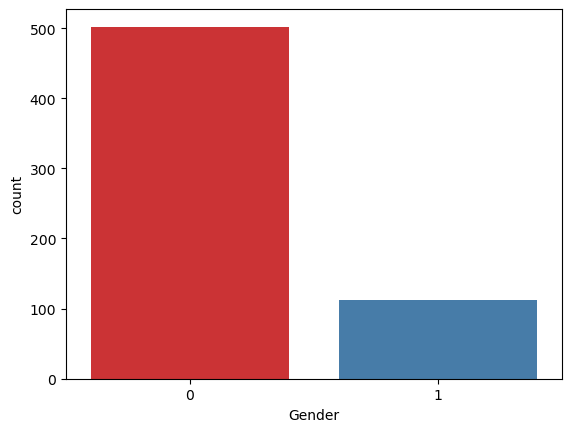

In [14]:
sns.countplot(x='Gender', data=df ,palette = 'Set1')

<AxesSubplot:xlabel='Education', ylabel='count'>

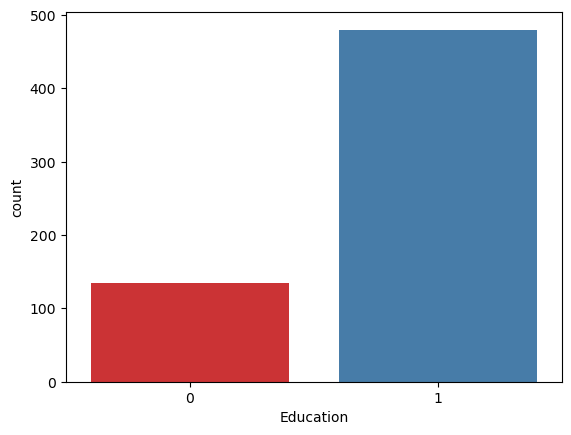

In [15]:
sns.countplot(x='Education', data=df ,palette = 'Set1')

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

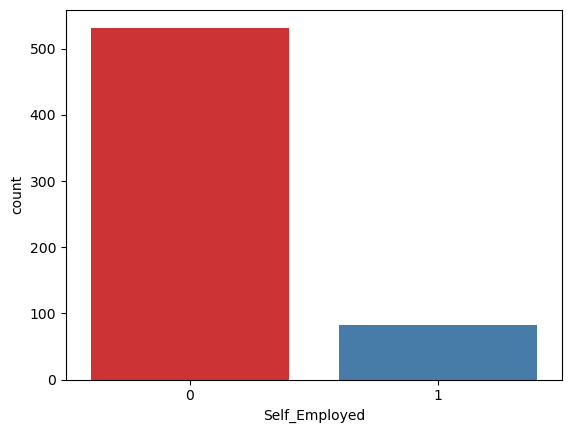

In [16]:
sns.countplot(x='Self_Employed', data=df ,palette = 'Set1')

<AxesSubplot:xlabel='LoanAmount', ylabel='count'>

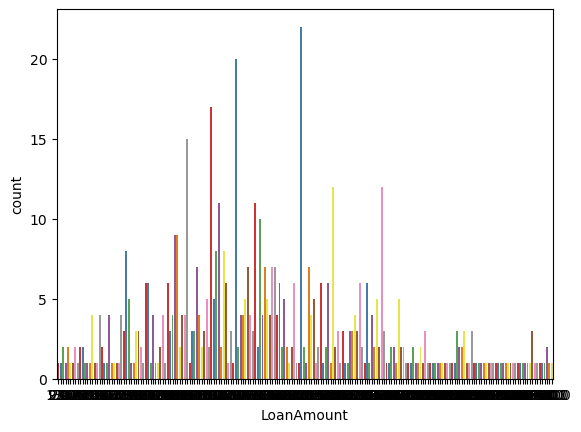

In [17]:
sns.countplot(x='LoanAmount', data=df ,palette = 'Set1')

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size =0.2, random_state=0)

# from sklearn.preprocessing import LabelEncoder
# Labelencoder_x = LabelEncoder()


In [19]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

C:\Users\bhakt\AppData\Local\Temp\ipykernel_19724\1389082028.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train, y_train)


RandomForestClassifier()

In [21]:
from sklearn import metrics
y_pred = rf_clf.predict(X_test)

print("Accuracy",metrics.accuracy_score(y_pred, y_test))
y_pred

Accuracy 0.7154471544715447


array([0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

In [22]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

C:\Users\bhakt\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [23]:
y_pred = nb_clf.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_pred, y_test))

Accuracy 0.8373983739837398


In [24]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [25]:
print("ML Completely Loaded")

ML Completely Loaded


In [33]:
print("User Input")
g=input('Enter your Gender 0-Male 1-Female')
m=input("Are you married ? Yes-1 No-0")
e=input("Your Education ? Graduate-1 Not Graduate-0")
s=input("Are you self employeed ? Yes-1 No-0")
a=input("Your Applicant income ?")
c=input("Your coApplicant income ?")
la=input("Your LoanAmount ")
lat=input("Your loan amount Term")
cd=input("Your Credit History")


User Input
Enter your Gender 0-Male 1-Female1
Are you married ? Yes-1 No-00
Your Education ? Graduate-1 Not Graduate-01
Are you self employeed ? Yes-1 No-01
Your Applicant income ?20000
Your coApplicant income ?15000
Your LoanAmount 10000
Your loan amount Term360
Your Credit History1


In [34]:
float(g)
float(m)
float(e)
float(s)
float(a)
float(c)
float(la)
float(lat)
float(cd)

1.0

In [35]:
data2=pd.DataFrame({'Gender':[g],'Married':[m],'Education':[e],'Self_Employeed':[s],'ApplicantIncome':[a],'CoapplicantIncome':[c],'LoanAmount':[la],'Loan_Amount_Term':[lat],'Credit_History':[cd]})

In [39]:
y_pred = nb_clf.predict(X_test)

In [40]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [41]:
y_pred = nb_clf.predict(data2)

C:\Users\bhakt\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


In [42]:
y_pred

array([0], dtype=int64)

In [43]:
if y_pred ==1:
    print("Loan Approved")
else:
    print("Loan not Approved")

Loan not Approved
